## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
import matplotlib.pyplot as plt
from keras.layers import Dropout
%matplotlib inline

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.5):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]

Experiment with drp_ratio = 0.250000, optimizer = SGD
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 74us/step - loss: 2.3471 - acc: 0.1033 - val_loss: 2.3014 - val_acc: 0.1041
Epoch 2/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3032 - acc: 0.1099 - val_loss: 2.3016 - val_acc: 0.1028
Epoch 3/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3006 - acc: 0.1151 - val_loss: 2.2997 - val_acc: 0.1162
Epoch 4/30
50000/50000 [==============================] - 3s 64us/step - loss: 2.2982 - acc: 0.1173 - val_loss: 2.2935 - val_acc: 0.1531
Epoch 5/30
50000/50000 [==============================] - 3s 65us/step - loss: 2.2954 - acc: 0.1180 - val_loss: 2.2832 - val_acc: 0.1651
Epoch 6/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.2869 - acc: 0.1257 - val_loss: 2.2643 - val_acc: 0.1574
Epoch 7/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.2733 - acc: 0.1335 - val_loss: 2.2371 - val_acc

50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - acc: 0.1004 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3026 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3026 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 3s 62us/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.0998
Epoch 19/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3025 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.0998
Epoch 20/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 21/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 22/30
50000/50000 [=====================

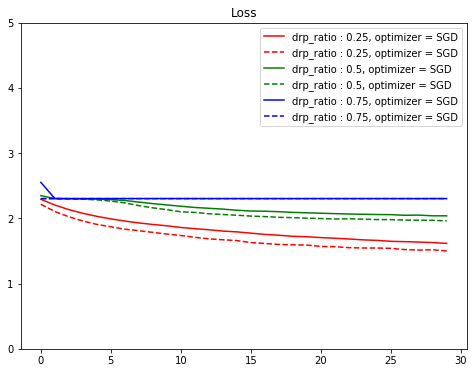

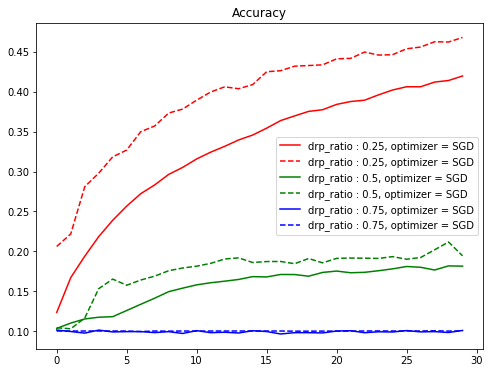

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_out in Dropout_EXP:

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with drp_ratio = %.6f" % (drp_out) + ", optimizer = SGD")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_out)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "drp_ratio : %s" % str(drp_out) + ", optimizer = SGD"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with drp_ratio = 0.250000, optimizer = Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)  

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 87us/step - loss: 2.3275 - acc: 0.1187 - val_loss: 2.2517 - val_acc: 0.1652
Epoch 2/30
50000/50000 [==============================] - 4s 73us/step - loss: 2.2511 - acc: 0.1432 - val_loss: 2.2306 - val_acc: 0.1701
Epoch 3/30
50000/50000 [==============================] - 4s 72us/step - loss: 2.2072 - acc: 0.1564 - val_loss: 2.1959 - val_acc: 0.1735
Epoch 4/30
50000/50000 [==============================] - 4s 73us/step - loss: 2.1827 - acc: 0.1611 - val_loss: 2.2176 - val_acc: 0.1491
Epoch 5/30
50000/50000 [==============================] - 4s 72us/step - loss: 2.1671 - acc: 0.1639 - val_loss: 2.2200 - val_acc: 0.1356
Epoch 6/30
50000/50000 [==============================] - 4s 71us/step - loss: 2.1529 - acc: 0.1678 - val_loss: 2.1842 - val_acc: 0.1526
Epoch 7/30
50000/50000 [==============================] - 4s 72us/step - loss: 2.1426 - acc: 0.1694 - val_loss: 2.2094 - val_acc

50000/50000 [==============================] - 4s 73us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 4s 73us/step - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 4s 73us/step - loss: 2.3028 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.0949 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 20/30
50000/50000 [==============================] - 4s 76us/step - loss: 2.3027 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 21/30
50000/50000 [==============================] - 4s 76us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 22/30
50000/50000 [=====================

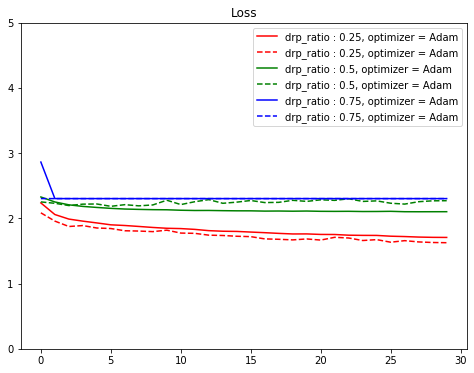

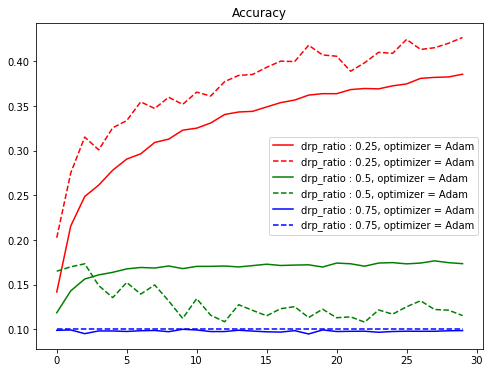

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_out in Dropout_EXP:

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with drp_ratio = %.6f" % (drp_out) + ", optimizer = Adam")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_out)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "drp_ratio : %s" % str(drp_out) + ", optimizer = Adam"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()